## [ 선형 회귀 (Linear Regression)]

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

from sklearn.linear_model import LinearRegression   # 선형회귀
from sklearn.metrics import mean_squared_error      # RMSE (Root Mean Squared Error) 
from sklearn.metrics import r2_score   

# 한글 출력을 위한 설정
import matplotlib
matplotlib.rcParams['font.family']="NanumBarunGothic"
matplotlib.rcParams['axes.unicode_minus'] = False

## [1] LinearRegression을 이용한 회귀 예측 모델 구현¶

In [2]:
df = pd.read_csv('../DataSet/cars.csv')

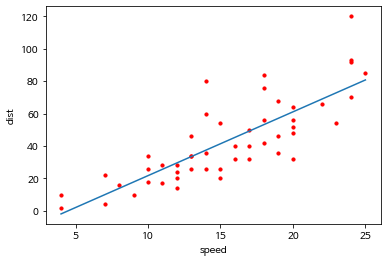

In [3]:
# 1 차원 (단항 , Feature =1 개) 회귀 모형의 예측 
lr = LinearRegression()

# 입출력 데이터를 설정 
x = df['speed'].values.reshape(-1, 1)    # (400,1)
y = df['dist'].values.reshape(-1, 1)  # (400, 1)

# 회귀 모형의 학습, (x , y)를 입력 
lr.fit(x, y)

# 예측 : x 만 입력 
y_predict = lr.predict(x)

# 시각화 
plt.scatter(x, y, color = 'r', s =10)
plt.xlabel('speed')
plt.ylabel('dist')

plt.plot(x, y_predict)
plt.show()

In [4]:
# 정확도 측정 
# RMSE = 오차 제곱에 root (평균 제곱근 편차, 표준 편차 ) - 예측값과 실제값을 뺀 후 제곱 시킨 값을 더해, n으로 나누고 루트를 씌운다.
# 예측값과 실제 값의 차이를 보여주기 
# https://brunch.co.kr/@chris-song/34

mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)   


print('RMSE: ', rmse)

r2 = r2_score(y, y_predict) 
# r2 = R - squred (결정계수)
# 결정계수(Coefficient of Determination) - 독립변수가 종속 변수에 대해 얼마나 설명력을 가지게 되는지 나타내는 수치 
# P-value 와 같이 0과 1사이의 값으로 나타낸다. 
# 0에 가까울수록 설명력이 낮고, 1에 가까울 수록 높다고 해석할 수 있다. 
# (예측값의 분산/ 실제값의 분산), https://jihongl.github.io/2017/09/16/Rsquared/

print('r2_score:', r2)

RMSE:  15.068855995791381
r2_score: 0.6510793807582509


## [2] LinearRegression 실전 연습

# [CalCoFI](https://www.kaggle.com/sohier/calcofi)

### Context

- CalCOFI 데이터 세트는 세계에서 가장 긴 (1949- 현재) 가장 완벽한 (50,000 개 이상의 샘플링 스테이션) 시계열 해양 및 애벌레 물고기 데이터를 나타냅니다. 
- 여기에는 250 종 이상의 어류의 유충에 대한 풍부한 데이터가 포함됩니다. 
- 주요 상업적 종에 대한 유충 길이 빈도 데이터 및 난 풍부도 데이터; 해양 및 플랑크톤 데이터. 
- 규칙적인 시간과 공간 간격으로 수집 된 물리적, 화학적 및 생물학적 데이터는 캘리포니아 주에서 기후주기를 기록하고 이에 대한 다양한 생물학적 반응을 기록하는 데 가치있게 되었습니다. 


- **Cst_Cnt** : Auto-numbered Cast Count - all casts consecutively numbered. 1 is first station done
- **Btl_Cnt** : Auto-numbered Bottle count- all bottles ever sampled, consecutively numbered
- **Sta_ID** : CalCOFI Line and Station
- **Depth_ID** : [Century]-[YY][MM][ShipCode]-[CastType][Julian Day]-[CastTime]-[Line][Sta][Depth][Bottle]-[Rec_Ind]
- **Depthm** - Depth in meters
- **T_degC** - Water temperature in degree Celsius
- **Salnty** - Salinity in g of salt per kg of water (g/kg)
- **O2ml_L** - O2 mixing ration in ml/L


### 60년이 넘는 해양 데이터: 
- 염분과 수온은 서로 관계가 있나? 
- 염분을 통해 수온을 예측할 수 있을까?  

In [5]:
bottle = pd.read_csv('../DataSet/calcofi/bottle.csv')
bottle.head()

/usr/local/var/pyenv/versions/3.7.4/envs/pv-python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [7]:
bottle_df = bottle[['T_degC', 'Salnty']]

In [8]:
bottle_df.columns = ['Temp', 'Sal']

In [45]:
bottle_df = bottle_df[:][:3000] 
bottle_df.head()

,Temp,Sal
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


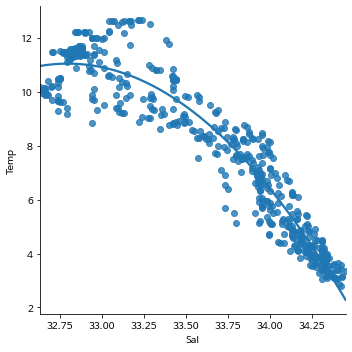

In [46]:
sns.lmplot(x ="Sal", y ="Temp", data = bottle_df, order = 2, ci = None) 

- 염도와 온도의 선형관계 성립 

### Fit linear regression models to the scatter plots: [link](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

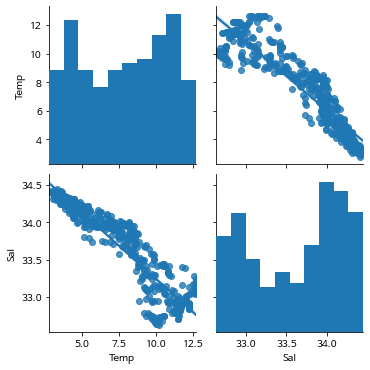

In [47]:
sns.pairplot(bottle_df, kind="reg")

###  Data cleaning

In [48]:
# null 값이 얼마나 있나
bottle_df.isnull().sum()

Temp    0
Sal     0
dtype: int64

In [49]:
#  ‘ffill’ = ‘forward fill’ NaN값을 앞으로 채우기 
bottle_df.fillna(method = 'ffill', inplace=True)

#bottle_df.isnull().sum()

### Features 선택

In [50]:
X = np.array(bottle_df['Sal']).reshape(-1, 1)
y = np.array(bottle_df['Temp']).reshape(-1, 1)

### test set / train set 나누기 

In [51]:
# test 20%, train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) 

## Linear Regression

In [52]:
# 1 차원 (단항 , Feature =1 개) 회귀 모형의 예측 
lr = LinearRegression()

### 선형 회귀 학습 

In [53]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 학습 정확도 

In [54]:
# Accuracy score 
accruacy_score = lr.score(X_test, y_test)
print("Linear Regression Medel Accuracy Score: " , "{:.1%}".format(accruacy_score))

Linear Regression Medel Accuracy Score:  82.7%


### 예측

In [55]:
# Predict Linear Model
y_pred =  lr.predict(X_test)

### 시각화 scatter 

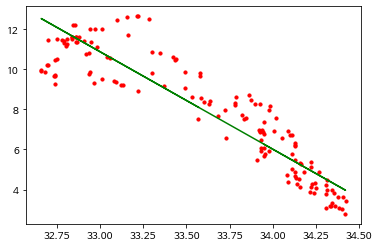

In [56]:
# 시각화 
plt.scatter(X_test, y_test, color = 'r', s =10)
plt.plot(X_test, y_pred, color = 'g')

plt.show()

### RMSE 

In [57]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE Score: " , "{:.3}".format(rmse))

RMSE Score:  1.19


### R2 Score 

In [58]:
r2 = r2_score(y_test, y_pred) 
print("R2 Score: " , "{:.3}".format(r2))

R2 Score:  0.827


## Multiple Linear Regression

In [59]:
cross_val_score(lr, X, y, cv=10, scoring = 'r2').mean()

0.7897720931156469

In [60]:
# r2 value
lr.score(X_train, y_train)   

0.8568676494015987

In [61]:
np.sqrt(-cross_val_score(lr,
                        X_train,
                        y_train,
                        cv=10,
                        scoring='neg_mean_squared_error')).mean()

1.1131154872826317

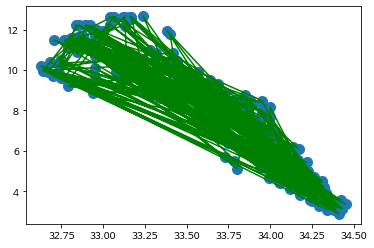

In [62]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()